In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
regex = re.compile(r"Min: (?P<min>-?\d+)\tMean: (?P<mean>-?\d+(\.\d+)?)\tMax: (?P<max>-?\d+)")

scoreOffset = 6
mins = []
means = []
maxs = []
with open('training-1000k.log') as logFile:
    for line in logFile.readlines():
        m = regex.search(line)
        if m is not None:
            mins.append(int(m.group('min'))+scoreOffset)
            means.append(float(m.group('mean'))+scoreOffset)
            maxs.append(int(m.group('max'))+scoreOffset)

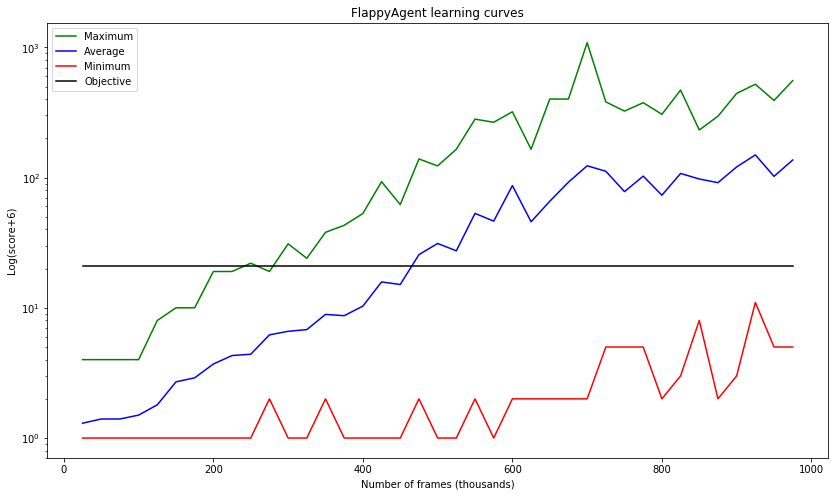

In [3]:
x = np.linspace(25,25*len(maxs),len(maxs))
plt.figure(figsize=(14,8))
plt.semilogy(x, maxs, 'g', label='Maximum')
plt.semilogy(x, means, 'b', label='Average')
plt.semilogy(x, mins, 'r', label='Minimum')
plt.semilogy(x, np.ones(len(x))*(15+scoreOffset), 'k', label='Objective')
plt.xlabel("Number of frames (thousands)")
plt.ylabel("Log(score+6)")
plt.legend()
_ = plt.title("FlappyAgent learning curves")